The taken data frame contains various category products with the brands sellling them, thir prices, rating and description of products

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('BigBasket Products.csv')
print("Shape:", df.shape)
df.head()

Shape: (4012, 7)


,index,category,brand,sale_price,market_price,rating,description
0,1,Beauty & Hygiene,Sri Sri Ayurveda,220.0,220.0,4.1,This Product contains Garlic Oil that is known...
1,2,"Kitchen, Garden & Pets",Mastercook,180.0,180.0,2.3,NaN
2,3,Cleaning & Household,Trm,119.0,250.0,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cleaning & Household,Nakoda,149.0,176.0,3.7,Multipurpose container with an attractive desi...
4,5,Beauty & Hygiene,Nivea,162.0,162.0,4.4,Nivea Creme Soft Soap gives your skin the best...


Some info about the data-set

In [2]:
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         4012 non-null   int64  
 1   category      3995 non-null   object 
 2   brand         3999 non-null   object 
 3   sale_price    3998 non-null   float64
 4   market_price  3990 non-null   float64
 5   rating        2720 non-null   float64
 6   description   3963 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 219.5+ KB
None
              index          category   brand   sale_price  market_price  \
count   4012.000000              3995    3999  3998.000000   3990.000000   
unique          NaN                11    1222          NaN           NaN   
top             NaN  Beauty & Hygiene  Fresho          NaN           NaN   
freq            NaN              1161      86          NaN           NaN   
mean    2006.500000               NaN     NaN   331.902291

Visualize distribution of categories and brands

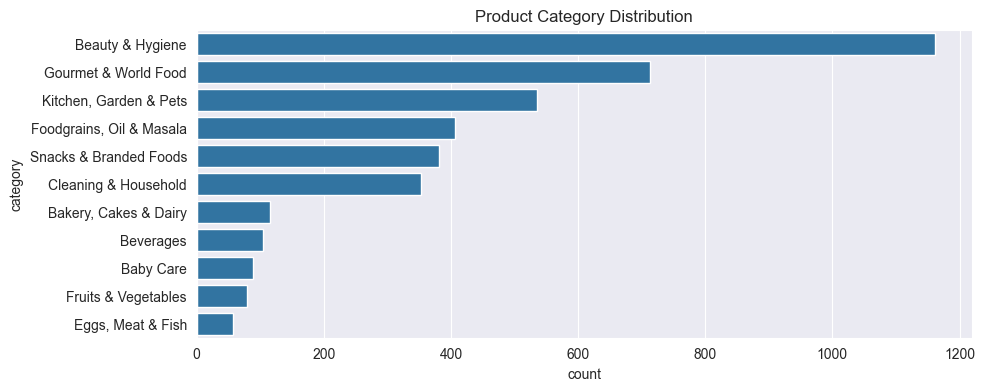

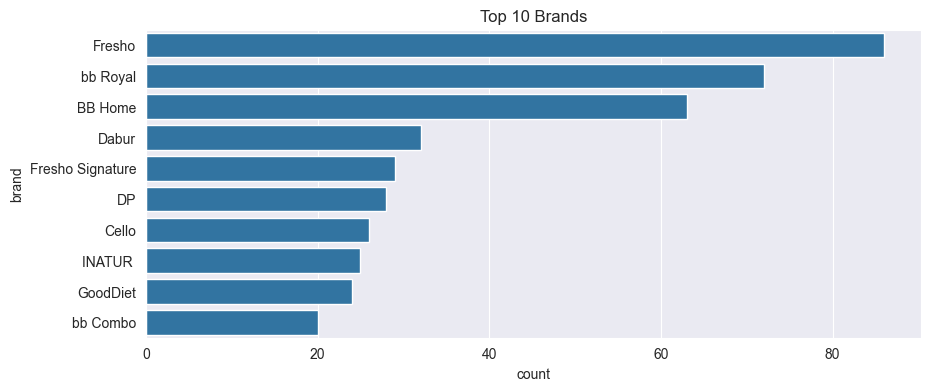

In [3]:
plt.figure(figsize=(10, 4))
sns.countplot(y='category', data=df, order=df['category'].value_counts().index)
plt.title('Product Category Distribution')
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(y='brand', data=df, order=df['brand'].value_counts().head(10).index)
plt.title('Top 10 Brands')
plt.show()

See for duplicate entries and if present, then removing them

In [4]:
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed. New shape:", df.shape)

Duplicate rows: 0


Seeing for missing entries :-
-Remove rows where any of the columns ('category', 'brand', 'sale_price') are NaN
-If 'market_price' is empty then fill it with 'sale_price'
-Fill missing 'rating' values with the median of the column
-Fill missing 'description' fields with an empty string

index              0
category          17
brand             13
sale_price        14
market_price      22
rating          1292
description       49
dtype: int64


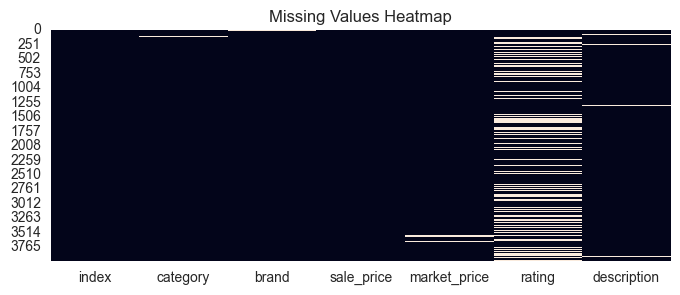

In [5]:
# Check missing values
print(df.isnull().sum())

# Visualize missing data
plt.figure(figsize=(8, 3))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

df = df.dropna(subset=['category', 'brand', 'sale_price'])
df['market_price'] = df['market_price'].fillna(df['sale_price'])

df['rating'] = df['rating'].fillna(df['rating'].median())

df['description'] = df['description'].fillna('')

Seeing for any inconsistencies in data, such as irregular text entries or sale_price greater than market_price etc.

In [6]:
# Check for inconsistent categories/brands (e.g., extra spaces, case)
df['category'] = df['category'].str.strip().str.title()
df['brand'] = df['brand'].str.strip().str.title()

print("Unique categories:", df['category'].unique())
print("Unique brands:", df['brand'].nunique())

# Check for sale_price > market_price (should not happen)
inconsistent_prices = df[df['sale_price'] > df['market_price']]
print("Entries with sale_price > market_price:", inconsistent_prices.shape[0])

Unique categories: ['Beauty & Hygiene' 'Kitchen, Garden & Pets' 'Cleaning & Household'
 'Gourmet & World Food' 'Foodgrains, Oil & Masala' 'Beverages'
 'Bakery, Cakes & Dairy' 'Snacks & Branded Foods' 'Baby Care'
 'Fruits & Vegetables' 'Eggs, Meat & Fish']
Unique brands: 1216
Entries with sale_price > market_price: 0


Data preprocessing:-
Text cleaning or removal of words which don't add much value to nlp in description of products; lower casing brands/category name

In [10]:
import re
import string
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


def clean_text(text):
    # Lowercase
    text = str(text).lower()
    # Removing URLs
    text = re.sub(r'http\S+', '', text)
    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Removing numbers
    text = re.sub(r'\d+', '', text)
    # Removing stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


df['clean_description'] = df['description'].apply(clean_text)

# Show before and after for an example
print("Before:", df['description'].iloc[0])
print("After:", df['clean_description'].iloc[0])

Before: This Product contains Garlic Oil that is known to help proper digestion, maintain proper cholesterol levels, support cardiovascular and also build immunity.  For Beauty tips, tricks & more visit https://bigbasket.blog/
After: product contains garlic oil known help proper digestion maintain proper cholesterol levels support cardiovascular also build immunity beauty tips tricks visit


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Visualising rating and prices

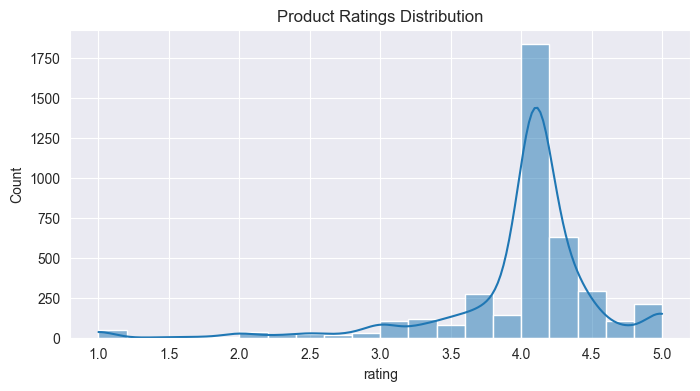

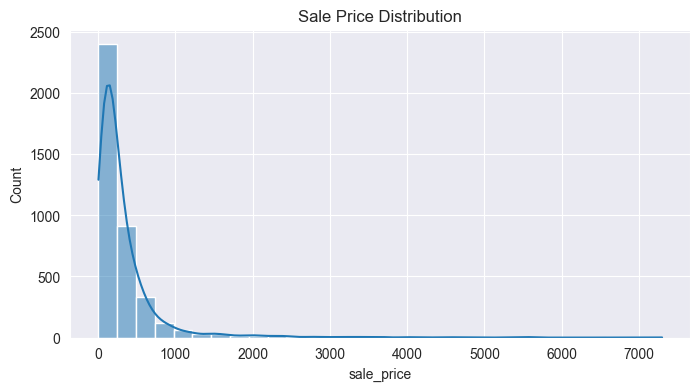

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Product Ratings Distribution')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['sale_price'], bins=30, kde=True)
plt.title('Sale Price Distribution')
plt.show()

Now, we will save the new data to new csv file

In [12]:
df.to_csv('BigBasket-Products-cleaned.csv', index=False)
print("Cleaned data saved.")

Cleaned data saved.


Displaying the clean dataset

In [13]:
# Display basic structure and summary
print("CLEANED DATASET INFO")
print("="*30)
print("\nShape of the dataset:", df.shape)

print("\nColumn Data Types and Non-Null Counts:")
print(df.info())

print("\nSample Rows:")
display(df.head())

print("\nStatistical Summary (Numerical Columns):")
print(df.describe())

print("\nNumber of Unique Values per Column:")
print(df.nunique())

print("\nMissing Values per Column:")
print(df.isnull().sum())

print("\nExample of Cleaned Description Text:")
print("Original:", df['description'].iloc[0])
print("Cleaned :", df['clean_description'].iloc[0])

CLEANED DATASET INFO

Shape of the dataset: (3970, 8)

Column Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
Index: 3970 entries, 0 to 4011
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              3970 non-null   int64  
 1   category           3970 non-null   object 
 2   brand              3970 non-null   object 
 3   sale_price         3970 non-null   float64
 4   market_price       3970 non-null   float64
 5   rating             3970 non-null   float64
 6   description        3970 non-null   object 
 7   clean_description  3970 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 279.1+ KB
None

Sample Rows:


,index,category,brand,sale_price,market_price,rating,description,clean_description
0,1,Beauty & Hygiene,Sri Sri Ayurveda,220.0,220.0,4.1,This Product contains Garlic Oil that is known...,product contains garlic oil known help proper ...
1,2,"Kitchen, Garden & Pets",Mastercook,180.0,180.0,2.3,,
2,3,Cleaning & Household,Trm,119.0,250.0,3.4,"A perfect gift for all occasions, be it your m...",perfect gift occasions mother sister inlaws bo...
3,4,Cleaning & Household,Nakoda,149.0,176.0,3.7,Multipurpose container with an attractive desi...,multipurpose container attractive design made ...
4,5,Beauty & Hygiene,Nivea,162.0,162.0,4.4,Nivea Creme Soft Soap gives your skin the best...,nivea creme soft soap gives skin best care mus...



Statistical Summary (Numerical Columns):
             index   sale_price  market_price       rating
count  3970.000000  3970.000000   3970.000000  3970.000000
mean   2008.052393   331.708567    393.168786     4.006524
std    1151.387338   523.053011    627.075984     0.599597
min       1.000000     5.000000      5.000000     1.000000
25%    1010.250000    95.000000    100.000000     4.000000
50%    2012.500000   189.050000    223.000000     4.100000
75%    3004.750000   362.217500    428.750000     4.200000
max    4012.000000  7299.000000  10695.000000     5.000000

Number of Unique Values per Column:
index                3970
category               11
brand                1216
sale_price           1163
market_price          649
rating                 36
description          3696
clean_description    3648
dtype: int64

Missing Values per Column:
index                0
category             0
brand                0
sale_price           0
market_price         0
rating               0
des